<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')







[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Data Collection</h1>

In [2]:
train_data = pd.read_csv('train_data.txt', delimiter=':::', names=["id", "movie", "genre", "summary"], engine='python')
test_data = pd.read_csv('test_data.txt', delimiter=':::', names=["id", "movie", "genre", "summary"], engine='python')

print(train_data.describe())
print(train_data.info())
print(train_data.head())


                 id
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       54214 non-null  int64 
 1   movie    54214 non-null  object
 2   genre    54214 non-null  object
 3   summary  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
   id                               movie       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                             summary  
0   Listening in to a conversation be

<h1>Data Cleaning</h1>

In [3]:

stop_words = set(stopwords.words('english'))
train_data['summary'] = train_data['summary'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

train_data['summary'] = train_data['summary'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

train_data['summary'] = train_data['summary'].apply(nltk.word_tokenize)

lemmatizer = WordNetLemmatizer()
train_data['summary'] = train_data['summary'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

print(train_data.head())


   id                               movie       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                             summary  
0  Listening conversation doctor parent 10yearold...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip Museum Natural Hi...  
3  help unemployed father make end meet Edith twi...  
4  film title refers unrecovered body ground zero...  


<h1>Data vectorization</h1>

In [4]:
tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['summary'])

print(tfidf_matrix.shape)

(54214, 146016)


<h1>Data Splitting</h1>

In [5]:
X = train_data['summary']
y = train_data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Data classification</h1>

In [6]:



svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(tfidf_vectorizer.transform(X_train), y_train)

test_tfidf_matrix = tfidf_vectorizer.transform(X_test)


predictions = svm_model.predict(test_tfidf_matrix)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


report = classification_report(y_test, predictions)
print(report)


Accuracy: 0.5941160195517846


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.53      0.33      0.41       263
       adult        0.79      0.41      0.54       112
   adventure        0.50      0.20      0.29       139
   animation        0.55      0.12      0.19       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.33      0.04      0.07       107
 documentary        0.68      0.85      0.75      2659
       drama        0.54      0.77      0.64      2697
      family        0.53      0.12      0.20       150
     fantasy        0.60      0.04      0.08        74
   game-show        0.95      0.50      0.66        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.63      0.65       431
       music        0.69      0.49      0.57       144
     musical        0.60      0.06      0.11        50
     mystery        0.50      0.02      0.03        56
        n

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Data visualization</h1>

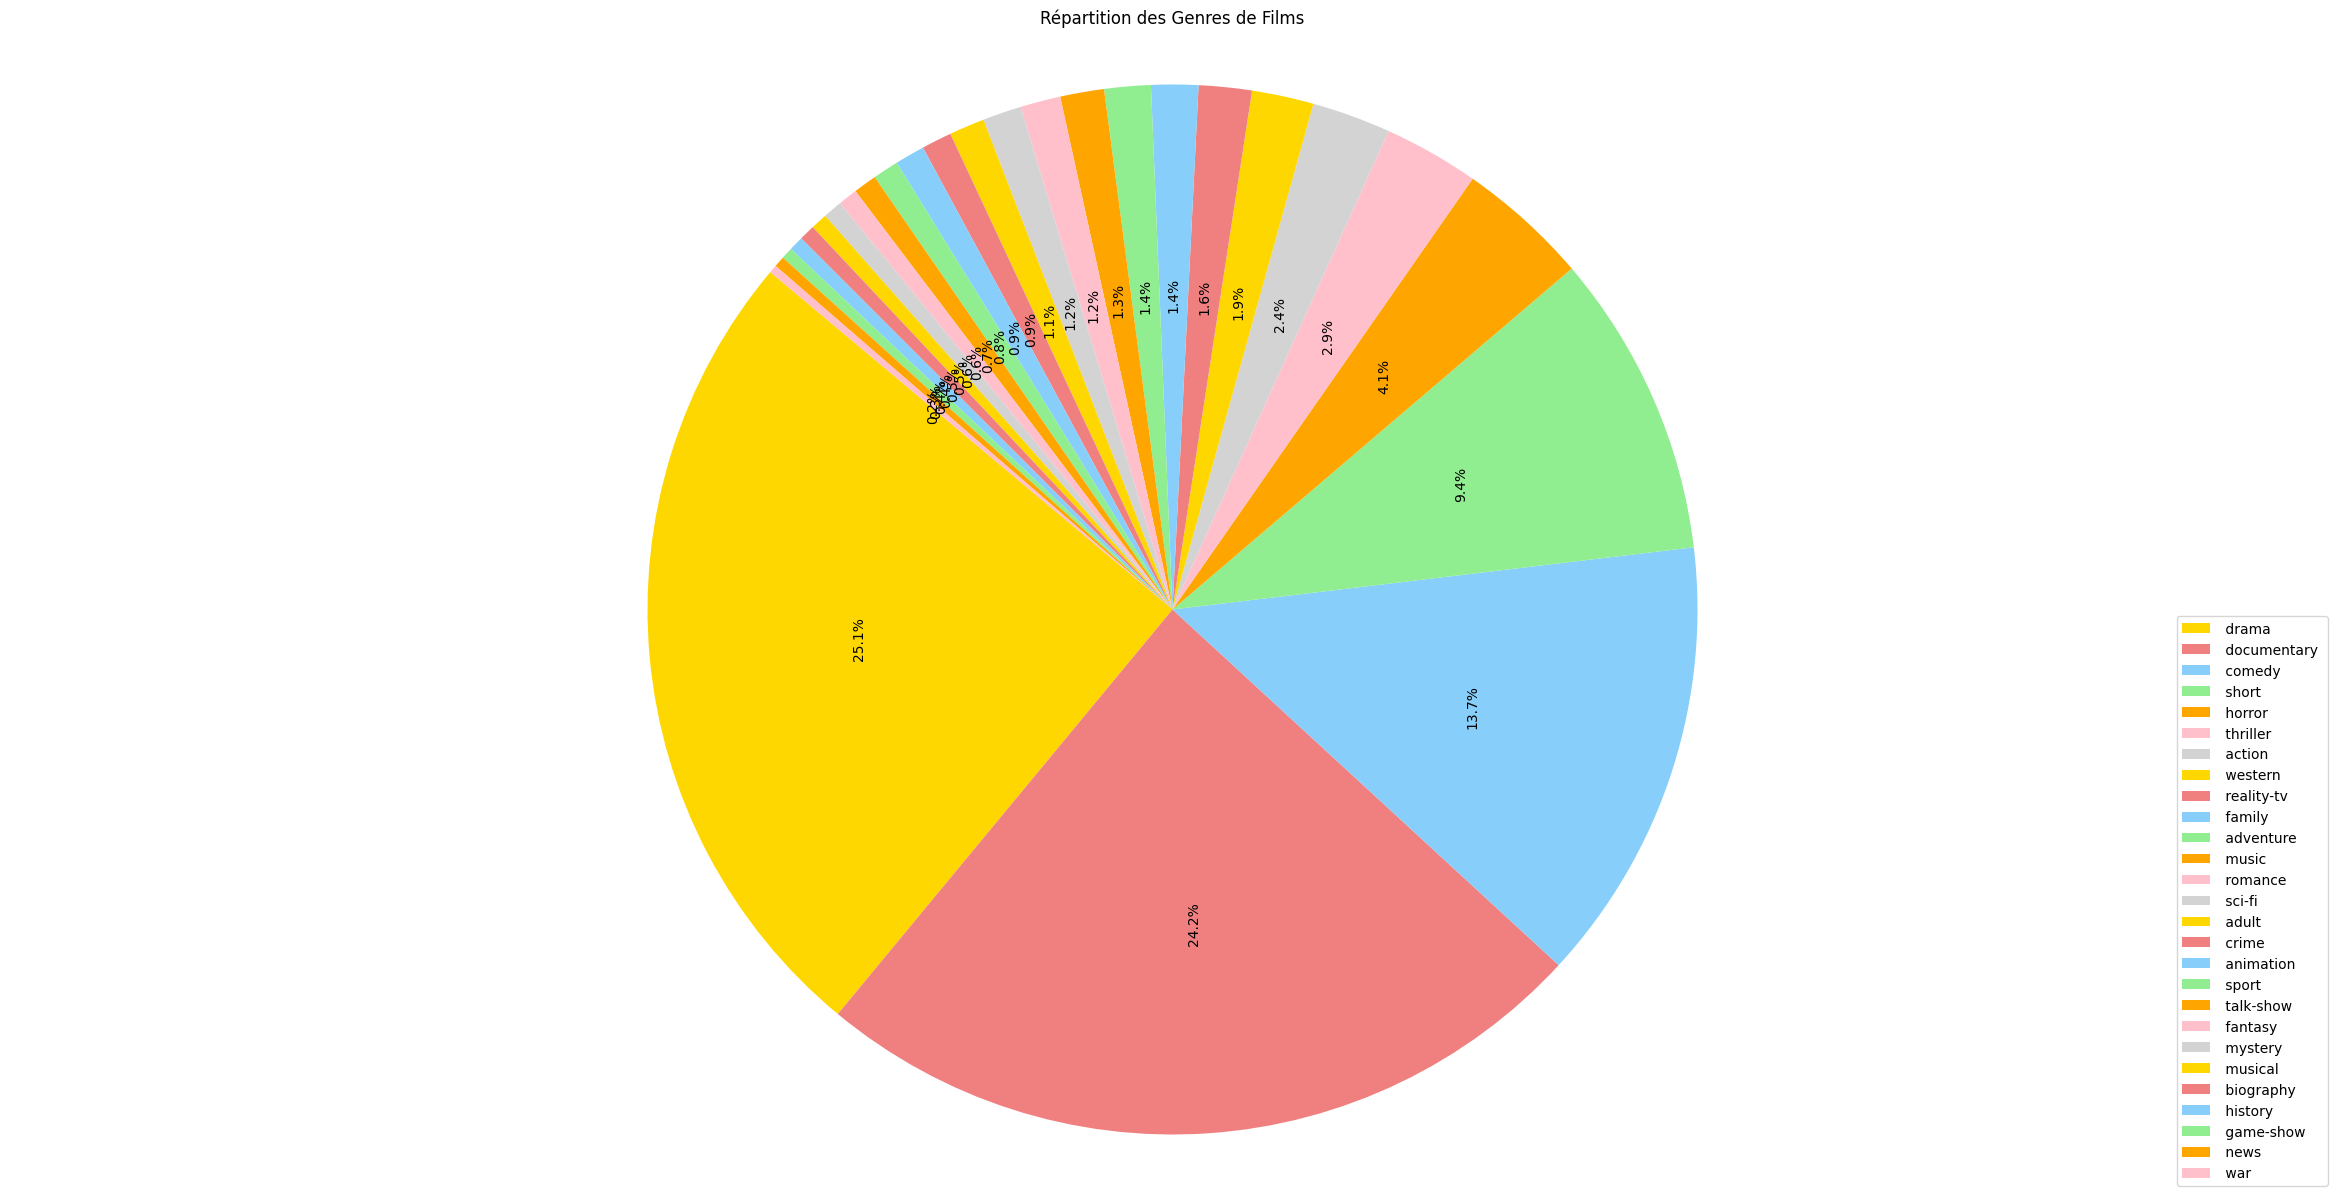

In [7]:

genre_counts = train_data['genre'].value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightgrey']
plt.figure(figsize=(30, 15))
plt.pie(genre_counts, labels=None, autopct=lambda p: '{:.1f}%'.format(p), colors=colors, startangle=140, textprops={'rotation': 90})
plt.title('Répartition des Genres de Films')
plt.legend(labels=genre_counts.index, loc='upper right', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

